In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import joblib

In [2]:
# load mnist data 
train = pd.read_csv("../datasets/digit-recognizer/train.csv")


In [3]:
train.head(3)
# 第一列为目标值

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train_img = train.iloc[:,1:] # 分离图像，获取特征值

In [6]:
train_img.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_labels = train.iloc[:,0]
train_labels.head(3) # 获取目标值

0    1
1    0
2    1
Name: label, dtype: int64

In [8]:
# 数据可视化
def to_plot(data,n):
    # 查看具体图像
    num = data.iloc[n,].values.reshape(28,28)
    plt.imshow(num)
    plt.show()

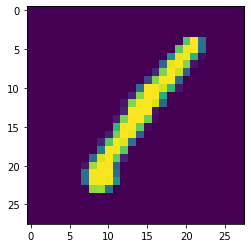

In [9]:
to_plot(train_img,0)

In [10]:
## 数据基本处理
# 归一化
train_img = train_img.values / 255

In [11]:
train_labels = train_labels.values

In [12]:
# 数据集分割
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_img,train_labels,random_state=22)


In [13]:
# 特征降维和模型训练
# 多次使用PCA确定最优模型


def n_components_analysis(n,x_train, y_train,x_val,y_val):
    # 记录开始时间
    start = time.time() 

    # PCA降维
    pca = PCA(n_components=n)
    pca.fit(x_train)

    # 在训练集和测试集进行降维
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)

    # svc训练
    clf = SVC()
    clf.fit(x_train_pca, y_train)

    # 获取accuracy
    accuracy = clf.score(x_val_pca,y_val)
    end = time.time()

    print(f"n_components={n},准确率{accuracy},时长{end-start}")
    return accuracy


In [36]:
# 传递多个 n_components,寻找合理的 n_components
n_s = np.linspace(0.7,0.85,num=5)
accuracy = []
for n in n_s:
    tmp = n_components_analysis(n,x_train, y_train,x_val,y_val)
    accuracy.append(tmp)

n_components=0.7,准确率0.9746666666666667,时长28.71670365333557
n_components=0.7374999999999999,准确率0.9776190476190476,时长30.660441875457764
n_components=0.7749999999999999,准确率0.978,时长42.7936110496521
n_components=0.8125,准确率0.9777142857142858,时长45.83981275558472
n_components=0.85,准确率0.9784761904761905,时长43.869324922561646


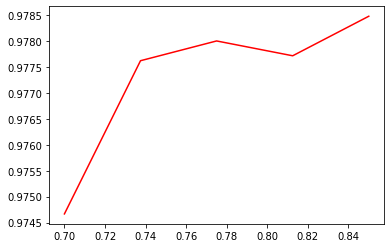

In [37]:
# 准确率可视化
plt.plot(n_s,np.array(accuracy),"r")
plt.show()
# 综合考虑选择n_components=0.74

In [14]:
# 确认模型
pca = PCA(n_components=0.74)
pca.fit(x_train)

# 查看降维后特征数量
pca.n_components_


32

In [15]:
# 在训练集和测试集进行降维
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)

In [16]:
x_train_pca.shape

(31500, 32)

In [17]:
x_val_pca.shape

(10500, 32)

In [18]:
# 训练模型
clf = SVC()
clf.fit(x_train_pca,y_train)

SVC()

In [21]:
# 计算 accuracy
clf.score(x_val_pca,y_val)

0.9774285714285714

In [22]:
# 保存模型
joblib.dump(clf,"out/svm_mnist.pkl")
joblib.dump(pca,"out/svm_mnist_pca.pkl")



['out/svm_mnist_pca.pkl']

In [3]:
# 加载模型
clf = joblib.load("out/svm_mnist.pkl")
pca = joblib.load("out/svm_mnist_pca.pkl")

In [5]:
# 导入test数据集
test = pd.read_csv("../datasets/digit-recognizer/test.csv")


In [6]:
test_minmax = test.values / 255

In [7]:
# PCA降维
test_pca = pca.transform(test_minmax)
test_pca

array([[ 3.32683816, -0.43820173,  3.09554955, ..., -0.62234075,
        -0.599734  ,  0.95332615],
       [ 4.4999214 , -0.09504849,  0.67374032, ...,  0.70733092,
        -0.15830732,  0.17341032],
       [-1.96643557,  0.3516777 ,  0.64467929, ..., -0.52059937,
         0.10087957,  0.13615413],
       ...,
       [-0.5478989 , -2.49358668, -3.45726211, ..., -0.20112724,
         0.63625648,  0.03320545],
       [-0.24594171,  2.25317708, -1.16218089, ..., -0.65191631,
         0.20164958,  0.56088938],
       [ 2.34619187,  0.57792559,  3.26255959, ..., -0.75021255,
         0.4860605 ,  0.59281922]])

In [14]:
# 显示多个图像
def show_images(data,nrows=3,ncols=3):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
    i=0
    for row in ax:
        for col in row:
            num = data.iloc[i,].values.reshape(28,28)
            col.imshow(num,cmap='gray')
            i=i+1
    plt.show()

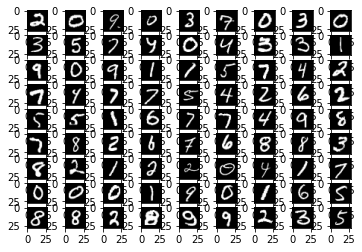

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 3,
 9,
 2,
 3,
 5]

In [15]:
# 查看并预测测试集前9个数据
pred = []
for i in range(0,81):
    tmp = clf.predict([test_pca[i,:]])[0]
    pred.append(tmp)
show_images(test,ncols=9,nrows=9)
pred